In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, Normalizer, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn import set_config
set_config(display='diagram')

from joblib import dump, load

In [2]:
df = pd.read_csv('hour.csv')

In [3]:
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11516,11517,2012-04-30,2,1,4,1,0,1,1,1,0.42,0.4242,0.77,0.0896,9,15,24
7938,7939,2011-12-02,4,0,12,10,0,5,1,1,0.30,0.2879,0.75,0.2239,16,89,105
14474,14475,2012-08-31,3,1,8,7,0,5,1,2,0.64,0.5758,0.89,0.0896,21,400,421
13590,13591,2012-07-25,3,1,7,11,0,3,1,1,0.76,0.6667,0.33,0.0000,79,202,281
13330,13331,2012-07-14,3,1,7,15,0,6,0,1,0.80,0.7576,0.55,0.1642,243,317,560


In [4]:
categorical_features = [
    'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'
]

numerical_features = [
    'temp', 'atemp', 'hum', 'windspeed'
]

In [5]:
all_features = categorical_features + numerical_features
all_features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [6]:
transformerzz = [
    ( 'one_hot', OneHotEncoder(handle_unknown='ignore'), categorical_features ),
    ( 'scaler', QuantileTransformer(), numerical_features),
    ( 'normalizer', Normalizer(), all_features )
]

ct = ColumnTransformer(transformers=transformerzz)

In [7]:
ct

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit']),
                                ('scaler', QuantileTransformer(),
                                 ['temp', 'atemp', 'hum', 'windspeed']),
                                ('normalizer', Normalizer(),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit', 'temp',
                                  'atemp', 'hum', 'windspeed'])])

In [8]:
steps = [
    ( 'column_transformer', ct ),
    ( 'model', MLPRegressor() )
]

pipeline = Pipeline(steps)

In [9]:
pipeline

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('scaler',
                                                  QuantileTransformer(),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('normalizer', Normalizer(),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday', 'weathersit',
                                                   'temp', 'atemp', 'hum',
                                                   'windspeed'])])),
                ('model', MLPRegressor())])

In [10]:
param_space = {
    'column_transformer__scaler__n_quantiles': [10, 100],
    'column_transformer__normalizer'         : [ Normalizer(), 'passthrough' ],
    'model__hidden_layer_sizes'              : [ (20, 20), (50, 50) ],
    'model__alpha'                           : [ 0.01, 0.001 ]
}

grid = GridSearchCV(pipeline, param_grid=param_space, cv=3, verbose=2)

In [11]:
X = df[all_features]
y = df['cnt']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   9.9s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=  11.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=  14.9s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  19.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  11.8s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   8.1s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.5s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.8s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.1s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.1s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.9s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.8s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.2s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.3s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.2s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.6s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   9.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   9.3s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.0s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   8.2s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   8.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   8.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  11.8s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  11.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   8.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   7.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  11.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=  12.4s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.7s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   7.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  12.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  8.4min finished


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=  11.9s


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit']),
                                                                        ('scaler',
                                                                         QuantileTransformer(),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed']),
                                                                        ('normalizer',
                                                                         Normalizer(),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit',
                                                                          'temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'])])),
                                       ('model', MLPRegressor())]),
             param_grid={'column_transformer__normalizer': [Normalizer(),
                                                            'passthrough'],
                         'column_transformer__scaler__n_quantiles': [10, 100],
                         'model__alpha': [0.01, 0.001],
                         'model__hidden_layer_sizes': [(20, 20), (50, 50)]},
             verbose=2)

In [14]:
grid.best_params_

{'column_transformer__normalizer': Normalizer(),
 'column_transformer__scaler__n_quantiles': 10,
 'model__alpha': 0.01,
 'model__hidden_layer_sizes': (50, 50)}

In [21]:
grid.best_estimator_

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('scaler',
                                                  QuantileTransformer(n_quantiles=10),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('normalizer', Normalizer(),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday', 'weathersit',
                                                   'temp', 'atemp', 'hum',
                                                   'windspeed'])])),
                ('model',
                 MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50)))])

In [22]:
dump(grid.best_estimator_, 'best_net.pkl')

['best_net.pkl']

In [23]:
pipe = load('best_net.pkl')

In [24]:
pipe.score(X_test, y_test)

0.9427423484968067

In [25]:
results = pd.DataFrame(grid.cv_results_)

In [36]:
results.to_csv('grid_results.csv')

In [37]:
predictions = pipe.predict(df)

C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [38]:
predictions

array([33.97112729, 21.8715846 , 20.09645648, ..., 77.43559801,
       62.41958152, 35.28435974])

In [39]:
df['predictions'] = predictions

In [40]:
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predictions
7148,7149,2011-10-30,4,0,10,11,0,0,0,1,0.36,0.3485,0.53,0.2239,58,182,240,269.255000
2661,2662,2011-04-25,2,0,4,19,0,1,1,1,0.66,0.6212,0.57,0.3284,62,320,382,322.099635
14926,14927,2012-09-19,3,1,9,3,0,3,1,2,0.52,0.5000,0.63,0.2537,1,4,5,9.447010
15328,15329,2012-10-05,4,1,10,21,0,5,1,1,0.60,0.5909,0.69,0.2239,47,220,267,278.290016
12036,12037,2012-05-21,2,1,5,17,0,1,1,2,0.66,0.6212,0.69,0.2537,40,468,508,637.524474


In [41]:
df['error'] = df['cnt'] - df['predictions']

In [42]:
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predictions,error
13052,13053,2012-07-03,3,1,7,1,0,2,1,1,0.72,0.6667,0.58,0.0000,5,9,14,18.430887,-4.430887
5867,5868,2011-09-06,3,0,9,23,0,2,1,3,0.54,0.5152,0.94,0.2537,2,56,58,32.689387,25.310613
14826,14827,2012-09-14,3,1,9,23,0,5,1,1,0.62,0.5909,0.78,0.0896,27,168,195,174.730619,20.269381
2040,2041,2011-03-30,2,0,3,21,0,3,1,2,0.24,0.2273,0.93,0.2537,0,27,27,50.568261,-23.568261
12517,12518,2012-06-10,2,1,6,18,0,0,0,1,0.82,0.7273,0.38,0.2239,164,326,490,523.644954,-33.644954


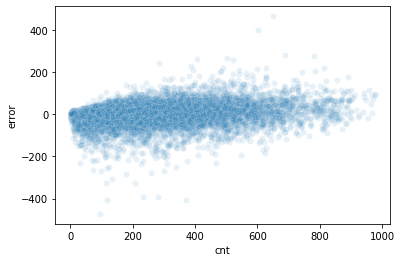

In [44]:
sns.scatterplot(data=df, x='cnt', y='error', alpha=0.1)

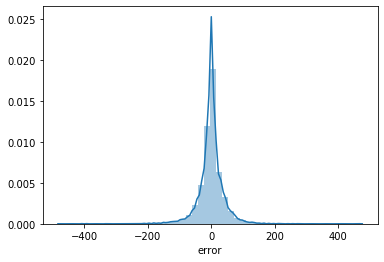

In [45]:
sns.distplot(df['error'])